In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import xarray as xr

In [48]:
df = pd.read_pickle('/home/hbkoziel/pyfesom/codes/transects/Transects_transport')
df /= 10**6
df.head()

,DAVIS_DIN_transport,DAVIS_VOL_transport,BERING_DIN_transport,BERING_VOL_transport,FRAM_DIN_transport,FRAM_VOL_transport,BSO_DIN_transport,BSO_VOL_transport
time,,,,,,,,
1985-01-01,-18.414102,-2.508610,5.097805,1.526888,-17.193391,-1.280298,19.836025,2.149108
1985-02-01,-20.351713,-2.625183,3.862312,0.946797,-16.748924,-1.194133,30.086166,3.473097
1985-03-01,-18.841612,-2.516344,5.238954,0.807539,-17.128430,-1.151412,23.603668,2.698374
1985-04-01,-11.313222,-1.833806,9.325522,1.254068,-10.406241,-0.885441,22.212744,2.380350
1985-05-01,-15.279633,-2.113982,10.954400,1.537659,-9.268519,-0.846484,18.412224,2.420874


In [49]:
df_seasonal_mean = df.groupby(by=[df.index.month]).mean()
df_seasonal_std = df.groupby(by=[df.index.month]).std()

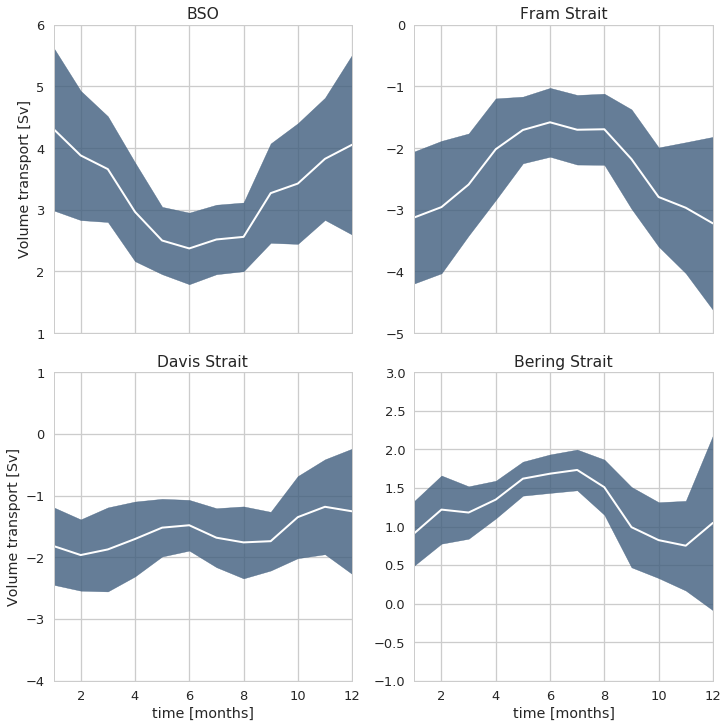

In [50]:
rows,cols = 2,2
figsize=(10, 10)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True, sharex=True, sharey=False)#sharey='row'

plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-talk')

ax1.plot(df_seasonal_mean.index, df_seasonal_mean['BSO_VOL_transport'], color="white", lw=2) 
ax1.fill_between(df_seasonal_mean.index, df_seasonal_mean['BSO_VOL_transport'] - df_seasonal_std['BSO_VOL_transport'],\
                 df_seasonal_mean['BSO_VOL_transport'] + df_seasonal_std['BSO_VOL_transport'], color="#3F5D7D", alpha=.8) 
ax1.set_title('BSO')
ax1.set_ylim(1,6)
ax1.set_ylabel('Volume transport [Sv]')

ax2.plot(df_seasonal_mean.index, df_seasonal_mean['FRAM_VOL_transport'], color="white", lw=2) 
ax2.fill_between(df_seasonal_mean.index, df_seasonal_mean['FRAM_VOL_transport'] - df_seasonal_std['FRAM_VOL_transport'],\
                 df_seasonal_mean['FRAM_VOL_transport'] + df_seasonal_std['FRAM_VOL_transport'], color="#3F5D7D", alpha=.8) 
ax2.set_title('Fram Strait')
ax2.set_ylim(-5,0)

ax3.plot(df_seasonal_mean.index, df_seasonal_mean['DAVIS_VOL_transport'], color="white", lw=2) 
ax3.fill_between(df_seasonal_mean.index, df_seasonal_mean['DAVIS_VOL_transport'] - df_seasonal_std['DAVIS_VOL_transport'],\
                 df_seasonal_mean['DAVIS_VOL_transport'] + df_seasonal_std['DAVIS_VOL_transport'], color="#3F5D7D", alpha=.8) 
ax3.set_title('Davis Strait')
ax3.set_ylim(-4,1)
ax3.set_ylabel('Volume transport [Sv]')
ax3.set_xlabel('time [months]')

ax4.plot(df_seasonal_mean.index, df_seasonal_mean['BERING_VOL_transport'], color="white", lw=2) 
ax4.fill_between(df_seasonal_mean.index, df_seasonal_mean['BERING_VOL_transport'] - df_seasonal_std['BERING_VOL_transport'],\
                 df_seasonal_mean['BERING_VOL_transport'] + df_seasonal_std['BERING_VOL_transport'], color="#3F5D7D", alpha=.8) 
ax4.set_title('Bering Strait')
ax4.set_ylim(-1,3)
ax4.set_xlabel('time [months]')

plt.xlim(1,12)
plt.savefig('/home/hbkoziel/pyfesom/figures/Arc12/validation/Volume_transport_seasonal.png', dpi = 300, bbox_inches='tight') 

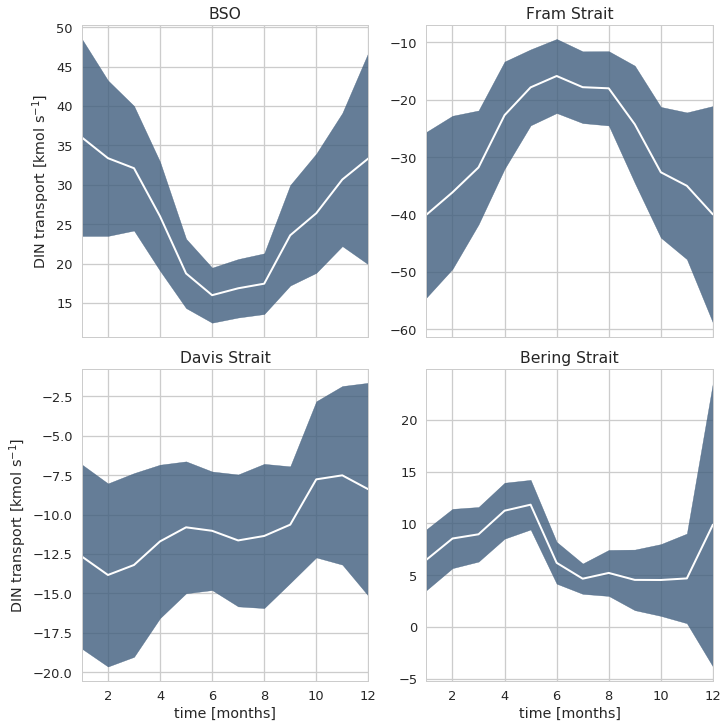

In [51]:
rows,cols = 2,2
figsize=(10, 10)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True, sharex=True, sharey=False)#sharey='row'

plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-talk')

ax1.plot(df_seasonal_mean.index, df_seasonal_mean['BSO_DIN_transport'], color="white", lw=2) 
ax1.fill_between(df_seasonal_mean.index, df_seasonal_mean['BSO_DIN_transport'] - df_seasonal_std['BSO_DIN_transport'],\
                 df_seasonal_mean['BSO_DIN_transport'] + df_seasonal_std['BSO_DIN_transport'], color="#3F5D7D", alpha=.8) 
ax1.set_title('BSO')
#ax1.set_ylim(1,6)
ax1.set_ylabel('DIN transport [kmol s$^{-1}$]')

ax2.plot(df_seasonal_mean.index, df_seasonal_mean['FRAM_DIN_transport'], color="white", lw=2) 
ax2.fill_between(df_seasonal_mean.index, df_seasonal_mean['FRAM_DIN_transport'] - df_seasonal_std['FRAM_DIN_transport'],\
                 df_seasonal_mean['FRAM_DIN_transport'] + df_seasonal_std['FRAM_DIN_transport'], color="#3F5D7D", alpha=.8) 
ax2.set_title('Fram Strait')
#ax2.set_ylim(-5,0)

ax3.plot(df_seasonal_mean.index, df_seasonal_mean['DAVIS_DIN_transport'], color="white", lw=2) 
ax3.fill_between(df_seasonal_mean.index, df_seasonal_mean['DAVIS_DIN_transport'] - df_seasonal_std['DAVIS_DIN_transport'],\
                 df_seasonal_mean['DAVIS_DIN_transport'] + df_seasonal_std['DAVIS_DIN_transport'], color="#3F5D7D", alpha=.8) 
ax3.set_title('Davis Strait')
#ax3.set_ylim(-4,1)
ax3.set_ylabel('DIN transport [kmol s$^{-1}$]')
ax3.set_xlabel('time [months]')

ax4.plot(df_seasonal_mean.index, df_seasonal_mean['BERING_DIN_transport'], color="white", lw=2) 
ax4.fill_between(df_seasonal_mean.index, df_seasonal_mean['BERING_DIN_transport'] - df_seasonal_std['BERING_DIN_transport'],\
                 df_seasonal_mean['BERING_DIN_transport'] + df_seasonal_std['BERING_DIN_transport'], color="#3F5D7D", alpha=.8) 
ax4.set_title('Bering Strait')
#ax4.set_ylim(-1,3)
ax4.set_xlabel('time [months]')

plt.xlim(1,12)
plt.savefig('/home/hbkoziel/pyfesom/figures/Arc12/validation/DIN_transport_seasonal.png', dpi = 300, bbox_inches='tight') 

In [52]:
df_interannual_mean = df.resample('YS').mean()
df_interannual_std = df.resample('YS').mean()

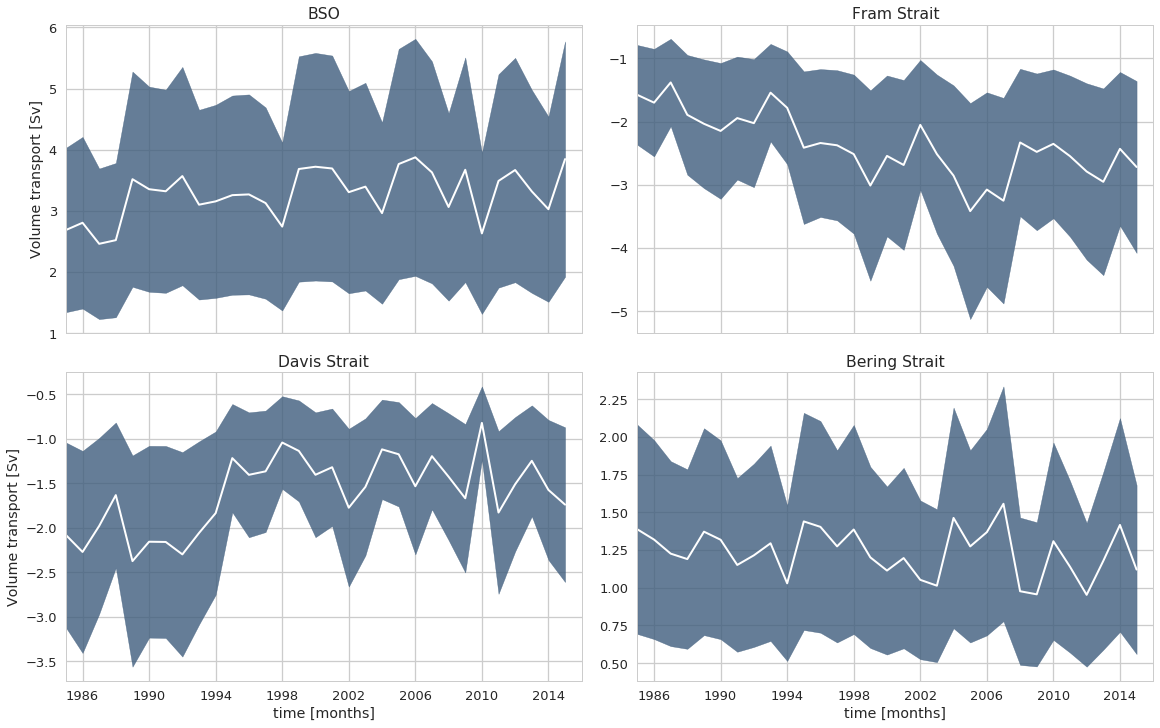

In [53]:
rows,cols = 2,2
figsize=(16, 10)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True, sharex=True, sharey=False)#sharey='row'

plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-talk')
dates = pd.date_range('1985', freq="YS", periods= len(np.arange(1985,2016)))

ax1.plot(dates, df_interannual_mean['BSO_VOL_transport'], color="white", lw=2) 
ax1.fill_between(df_interannual_mean.index, df_interannual_mean['BSO_VOL_transport'] - df_interannual_std['BSO_VOL_transport']/2,\
                 df_interannual_mean['BSO_VOL_transport'] + df_interannual_std['BSO_VOL_transport']/2, color="#3F5D7D", alpha=.8) 
ax1.set_title('BSO')
#ax1.set_ylim(1,6)
ax1.set_ylabel('Volume transport [Sv]')

ax2.plot(dates, df_interannual_mean['FRAM_VOL_transport'], color="white", lw=2) 
ax2.fill_between(df_interannual_mean.index, df_interannual_mean['FRAM_VOL_transport'] - df_interannual_std['FRAM_VOL_transport']/2,\
                 df_interannual_mean['FRAM_VOL_transport'] + df_interannual_std['FRAM_VOL_transport']/2, color="#3F5D7D", alpha=.8) 
ax2.set_title('Fram Strait')
#ax2.set_ylim(-5,0)
ax2.set_xlim(pd.Timestamp('1985-01-01'), pd.Timestamp('2016-01-01'))

ax3.plot(dates, df_interannual_mean['DAVIS_VOL_transport'], color="white", lw=2) 
ax3.fill_between(df_interannual_mean.index, df_interannual_mean['DAVIS_VOL_transport'] - df_interannual_std['DAVIS_VOL_transport']/2,\
                 df_interannual_mean['DAVIS_VOL_transport'] + df_interannual_std['DAVIS_VOL_transport']/2, color="#3F5D7D", alpha=.8) 
ax3.set_title('Davis Strait')
#ax3.set_ylim(-4,1)
ax3.set_ylabel('Volume transport [Sv]')
ax3.set_xlabel('time [months]')

ax4.plot(dates, df_interannual_mean['BERING_VOL_transport'], color="white", lw=2) 
ax4.fill_between(df_interannual_mean.index, df_interannual_mean['BERING_VOL_transport'] - df_interannual_std['BERING_VOL_transport']/2,\
                 df_interannual_mean['BERING_VOL_transport'] + df_interannual_std['BERING_VOL_transport']/2, color="#3F5D7D", alpha=.8) 
ax4.set_title('Bering Strait')
#ax4.set_ylim(-1,3)
ax4.set_xlabel('time [months]')

plt.savefig('/home/hbkoziel/pyfesom/figures/Arc12/validation/Volume_transport_interannual.png', dpi = 300, bbox_inches='tight') 

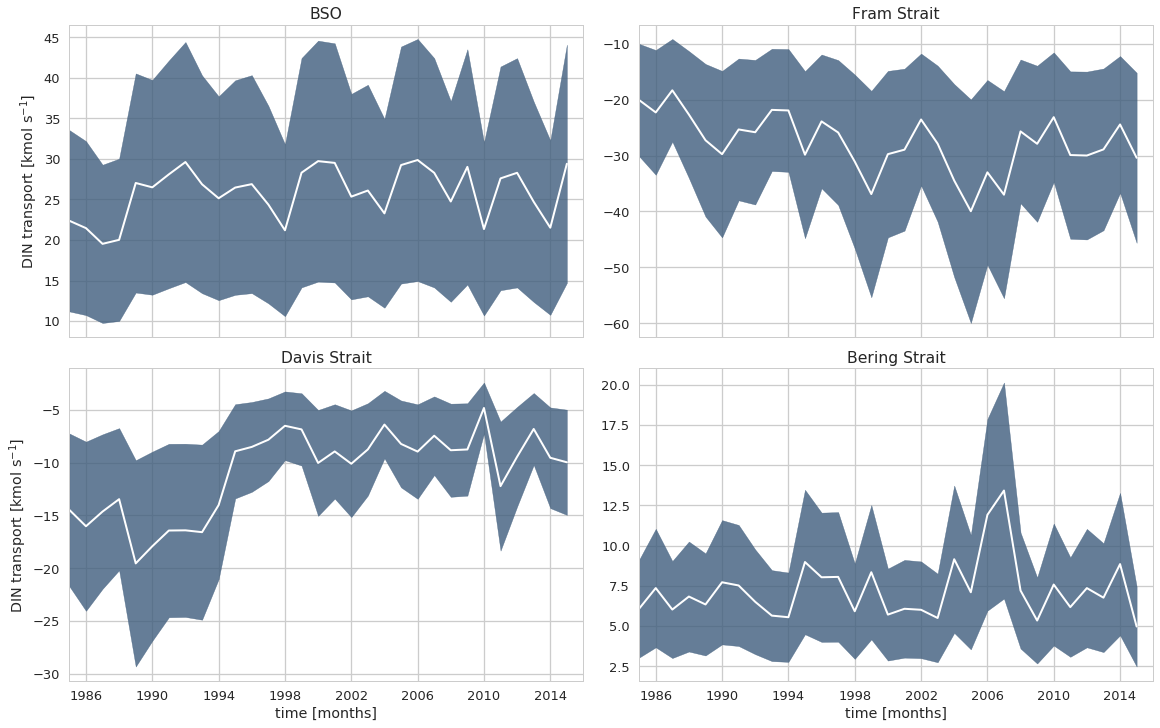

In [54]:
rows,cols = 2,2
figsize=(16, 10)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True, sharex=True, sharey=False)#sharey='row'

plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-talk')
dates = pd.date_range('1985', freq="YS", periods= len(np.arange(1985,2016)))

ax1.plot(dates, df_interannual_mean['BSO_DIN_transport'], color="white", lw=2) 
ax1.fill_between(df_interannual_mean.index, df_interannual_mean['BSO_DIN_transport'] - df_interannual_std['BSO_DIN_transport']/2,\
                 df_interannual_mean['BSO_DIN_transport'] + df_interannual_std['BSO_DIN_transport']/2, color="#3F5D7D", alpha=.8) 
ax1.set_title('BSO')
#ax1.set_ylim(1,6)
ax1.set_ylabel('DIN transport [kmol s$^{-1}$]')

ax2.plot(dates, df_interannual_mean['FRAM_DIN_transport'], color="white", lw=2) 
ax2.fill_between(df_interannual_mean.index, df_interannual_mean['FRAM_DIN_transport'] - df_interannual_std['FRAM_DIN_transport']/2,\
                 df_interannual_mean['FRAM_DIN_transport'] + df_interannual_std['FRAM_DIN_transport']/2, color="#3F5D7D", alpha=.8) 
ax2.set_title('Fram Strait')
#ax2.set_ylim(-5,0)
ax2.set_xlim(pd.Timestamp('1985-01-01'), pd.Timestamp('2016-01-01'))

ax3.plot(dates, df_interannual_mean['DAVIS_DIN_transport'], color="white", lw=2) 
ax3.fill_between(df_interannual_mean.index, df_interannual_mean['DAVIS_DIN_transport'] - df_interannual_std['DAVIS_DIN_transport']/2,\
                 df_interannual_mean['DAVIS_DIN_transport'] + df_interannual_std['DAVIS_DIN_transport']/2, color="#3F5D7D", alpha=.8) 
ax3.set_title('Davis Strait')
#ax3.set_ylim(-4,1)
ax3.set_ylabel('DIN transport [kmol s$^{-1}$]')
ax3.set_xlabel('time [months]')

ax4.plot(dates, df_interannual_mean['BERING_DIN_transport'], color="white", lw=2) 
ax4.fill_between(df_interannual_mean.index, df_interannual_mean['BERING_DIN_transport'] - df_interannual_std['BERING_DIN_transport']/2,\
                 df_interannual_mean['BERING_DIN_transport'] + df_interannual_std['BERING_DIN_transport']/2, color="#3F5D7D", alpha=.8) 
ax4.set_title('Bering Strait')
#ax4.set_ylim(-1,3)
ax4.set_xlabel('time [months]')

plt.savefig('/home/hbkoziel/pyfesom/figures/Arc12/validation/DIN_transport_interannual.png', dpi = 300, bbox_inches='tight') 

# Nutrient concentrations at BSO

In [55]:
df = pd.read_pickle('/home/hbkoziel/pyfesom/codes/transects/BSO_nut')

In [56]:
df.head()

,DIN_obs,DIN_obs_std,DSI_obs,DSI_obs_std,DIN_model,DIN_model_std,DSI_model,DSI_model_std
time,,,,,,,,
1980-01-01,6.264762,NaN,3.440426,NaN,9.465994,0.671198,4.705095,0.472633
1981-01-01,8.346186,2.263640,4.630253,0.830755,9.200206,0.869880,4.105564,0.502091
1982-01-01,10.158292,1.903722,5.211947,0.469458,9.172060,0.800032,3.669143,0.426645
1983-01-01,8.510577,0.326810,4.597768,0.826150,8.847962,0.807901,3.301306,0.354529
1984-01-01,12.540720,0.532246,5.372361,0.747900,8.803988,0.692813,3.169302,0.281649


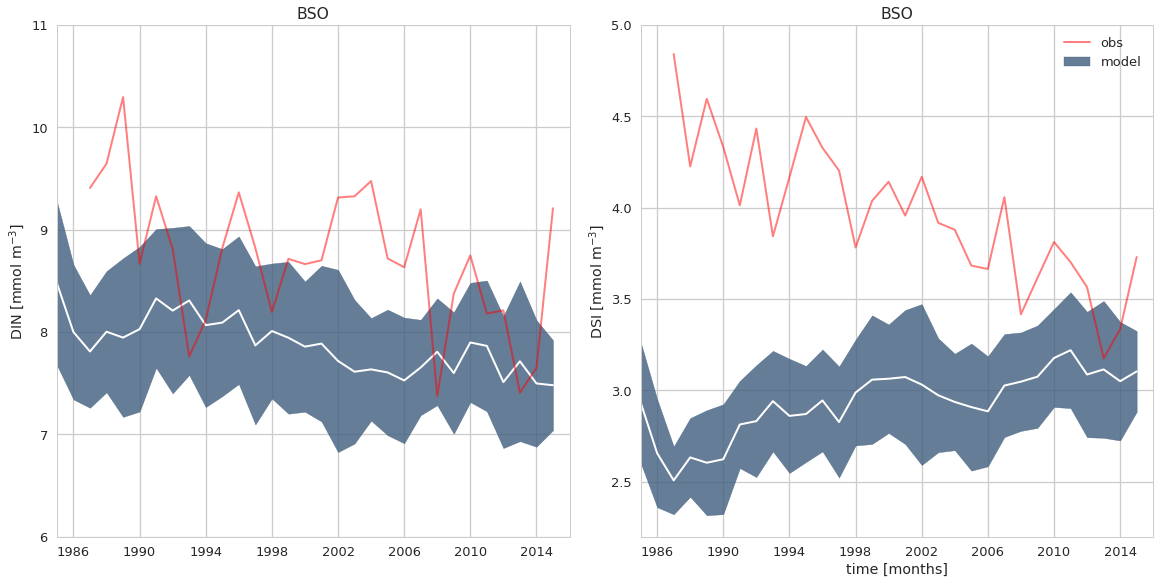

In [57]:
rows,cols = 1,2
figsize=(16, 8)
fig, ((ax1, ax2)) = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True, sharex=True, sharey=False)#sharey='row'

plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-talk')
dates = pd.date_range('1980', freq="YS", periods= len(np.arange(1980,2016)))

ax1.plot(dates, df['DIN_model'], color="white", lw=2) 
ax1.fill_between(dates, df['DIN_model'] - df['DIN_model_std'],\
                 df['DIN_model'] + df['DIN_model_std'], color="#3F5D7D", alpha=.8)
ax1.plot(dates, df['DIN_obs'], color='red', lw=2, alpha=.5) 
ax1.set_title('BSO')
ax1.set_ylim(6,11)
ax1.set_ylabel('DIN [mmol m$^{-3}$]')

ax2.plot(dates, df['DSI_model'], color="white", lw=2,label='') 
ax2.fill_between(dates, df['DSI_model'] - df['DSI_model_std'],\
                 df['DSI_model'] + df['DSI_model_std'], color="#3F5D7D", alpha=.8,label='model')
ax2.plot(dates, df['DSI_obs'], color='red', lw=2, alpha=.5,label='obs') 
ax2.set_title('BSO')
ax2.set_ylim(2.2,5)
ax2.set_ylabel('DSI [mmol m$^{-3}$]')
ax2.set_xlabel('time [months]')
ax2.set_xlim(pd.Timestamp('1985-01-01'), pd.Timestamp('2016-01-01'))

ax2.legend()
plt.savefig('/home/hbkoziel/pyfesom/figures/Arc12/validation/DIN_DSI_BSO_interannual.png', dpi = 300, bbox_inches='tight') 

In [58]:
range(100)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]